In [1]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict_one = pickle.load(fo, encoding='bytes')
    return dict_one


data_batch_1 = unpickle('cifar-10-python/cifar-10-batches-py/data_batch_1')

In [2]:
data_list_keys = list(data_batch_1.keys()); data_list_keys

[b'batch_label', b'labels', b'data', b'filenames']

In [3]:
data_items = list(data_batch_1.items()); data_items[1][0], data_items[2][0]

(b'labels', b'data')

In [4]:
labels_list = data_items[1][1]

In [5]:
len(labels_list)

10000

In [6]:
data_list = data_items[2][1]

In [7]:
len(data_list)

10000

In [8]:
first_data_point = data_list[0]

In [9]:
first_data_point.shape

(3072,)

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import glob, os

In [11]:
single_img_reshaped = np.transpose(np.reshape(first_data_point,(3, 32, 32)), (1,2,0)); single_img_reshaped.shape

(32, 32, 3)

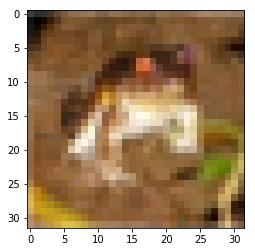

In [12]:
plt.imshow(single_img_reshaped)

In [91]:
def data_read(files_path):
    
    
    training_files = glob.glob(files_path + "*data_batch*")
    training_files_data_list = []
    training_files_labels_list = []
    training_files_data_array_list = []
    
    test_files = glob.glob(files_path + "*test_batch*")
    test_files_data_list = []
    test_files_labels_list = []
    test_files_data_array_list = []
    
    
    for training_file_index, training_file in enumerate(training_files):
        print("Reading train file: ", training_file)
        data_batch = unpickle(training_file)
        
        data_items = list(data_batch.items())
        labels_list = data_items[1][1]
        data_list = data_items[2][1]
        
        training_files_data_list.append(data_list)
        training_files_labels_list.append(labels_list)
        
        
    for test_file_index, test_file in enumerate(test_files):
        print("Reading test file: ", training_file)
        data_batch = unpickle(test_file)
        
        data_items = list(data_batch.items())
        labels_list = data_items[1][1]
        data_list = data_items[2][1]
        
        test_files_data_list.append(data_list)
        test_files_labels_list.append(labels_list)
        
    training_files_data_array = np.asarray(training_files_data_list).reshape((50000, 3072))
    training_files_labels_array = np.asarray(training_files_labels_list).reshape((50000,))
    
    test_files_data_array = np.asarray(test_files_data_list).reshape((10000, 3072))
    test_files_labels_array = np.asarray(test_files_labels_list).reshape((10000,))
    
    return training_files_data_array, training_files_labels_array, test_files_data_array, test_files_labels_array
    
    
files_path = 'cifar-10-python/cifar-10-batches-py/'
training_files_data_array, training_files_labels_array, test_files_data_array, test_files_labels_array = data_read(files_path)

print(training_files_data_array.shape, training_files_labels_array.shape,
      test_files_data_array.shape, test_files_labels_array.shape)

Reading train file:  cifar-10-python/cifar-10-batches-py\data_batch_1
Reading train file:  cifar-10-python/cifar-10-batches-py\data_batch_2
Reading train file:  cifar-10-python/cifar-10-batches-py\data_batch_3
Reading train file:  cifar-10-python/cifar-10-batches-py\data_batch_4
Reading train file:  cifar-10-python/cifar-10-batches-py\data_batch_5
Reading test file:  cifar-10-python/cifar-10-batches-py\data_batch_5
(50000, 3072) (50000,) (10000, 3072) (10000,)


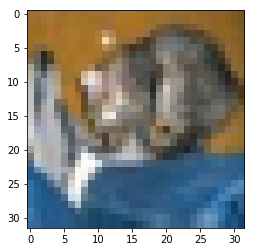

In [90]:
single_img = np.transpose(np.reshape(test_files_data_array[0],(3, 32, 32)), (1,2,0)); single_img.shape
plt.imshow(single_img)

In [93]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(3072,)))
network.add(layers.Dense(10, activation='softmax'))

In [94]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [95]:
train_images = training_files_data_array.astype('float32') / 255
test_images = test_files_data_array.astype('float32') / 255

In [96]:
from keras.utils import to_categorical

train_labels = to_categorical(training_files_labels_array)
test_labels = to_categorical(test_files_labels_array)

In [97]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
50000/50000 [==============================] - 18s 364us/step - loss: 3.1239 - acc: 0.2344
Epoch 2/5
50000/50000 [==============================] - 18s 359us/step - loss: 1.8285 - acc: 0.3464
Epoch 3/5
50000/50000 [==============================] - 19s 371us/step - loss: 1.7280 - acc: 0.3829
Epoch 4/5
50000/50000 [==============================] - 18s 367us/step - loss: 1.6661 - acc: 0.40751s - loss
Epoch 5/5
50000/50000 [==============================] - 18s 361us/step - loss: 1.6209 - acc: 0.4269


In [98]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 144us/step


In [99]:
print('test_acc:', test_acc)

test_acc: 0.3849


In [100]:
# Imporovisation on base model 
# Test 1

from keras import models
from keras import layers

network_1 = models.Sequential()
network_1.add(layers.Dense(512, activation='relu', input_shape=(3072,)))
network_1.add(layers.Dense(10, activation='softmax'))

network_1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network_1.fit(train_images, train_labels, epochs=10, batch_size=128)

test_loss_1, test_acc_1 = network_1.evaluate(test_images, test_labels)

print('test_acc:', test_acc_1)

Epoch 1/10
50000/50000 [==============================] - 18s 351us/step - loss: 3.0606 - acc: 0.2424
Epoch 2/10
50000/50000 [==============================] - 18s 353us/step - loss: 1.8287 - acc: 0.3461
Epoch 3/10
50000/50000 [==============================] - 19s 372us/step - loss: 1.7243 - acc: 0.3872
Epoch 4/10
50000/50000 [==============================] - 17s 338us/step - loss: 1.6668 - acc: 0.4109
Epoch 5/10
50000/50000 [==============================] - 17s 339us/step - loss: 1.6203 - acc: 0.4262
Epoch 6/10
50000/50000 [==============================] - 17s 344us/step - loss: 1.5911 - acc: 0.4364
Epoch 7/10
50000/50000 [==============================] - 18s 362us/step - loss: 1.5634 - acc: 0.4490
Epoch 8/10
50000/50000 [==============================] - 17s 343us/step - loss: 1.5379 - acc: 0.4570
Epoch 9/10
50000/50000 [==============================] - 17s 337us/step - loss: 1.5248 - acc: 0.4620
Epoch 10/10
10000/10000 [==============================] - 2s 164us/step
test_acc:

In [102]:
# Imporovisation on base model 
# Test 2

from keras import models
from keras import layers

network_2 = models.Sequential()
network_2.add(layers.Dense(1024, activation='relu', input_shape=(3072,)))
network_2.add(layers.Dense(10, activation='softmax'))

network_2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network_2.fit(train_images, train_labels, epochs=10, batch_size=128)

test_loss_2, test_acc_2 = network_2.evaluate(test_images, test_labels)

print('test_acc:', test_acc_2)

Epoch 1/10
50000/50000 [==============================] - 35s 702us/step - loss: 6.4719 - acc: 0.1781
Epoch 2/10
50000/50000 [==============================] - 35s 700us/step - loss: 1.8853 - acc: 0.3230
Epoch 3/10
50000/50000 [==============================] - 36s 714us/step - loss: 1.7431 - acc: 0.3775
Epoch 4/10
50000/50000 [==============================] - 34s 676us/step - loss: 1.6712 - acc: 0.4083
Epoch 5/10
50000/50000 [==============================] - 32s 648us/step - loss: 1.6216 - acc: 0.4247
Epoch 6/10
50000/50000 [==============================] - 32s 645us/step - loss: 1.5849 - acc: 0.4371
Epoch 7/10
50000/50000 [==============================] - 33s 651us/step - loss: 1.5574 - acc: 0.4492
Epoch 8/10
50000/50000 [==============================] - 32s 646us/step - loss: 1.5258 - acc: 0.4613
Epoch 9/10
50000/50000 [==============================] - 32s 647us/step - loss: 1.5071 - acc: 0.4679
Epoch 10/10
10000/10000 [==============================] - 3s 291us/step
test_acc:

In [103]:
# Imporovisation on base model 
# Test 3

from keras import models
from keras import layers

network_3 = models.Sequential()
network_3.add(layers.Dense(512, activation='relu', input_shape=(3072,)))
network_3.add(layers.Dense(10, activation='softmax'))

network_3.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network_3.fit(train_images, train_labels, epochs=20, batch_size=128)

test_loss_3, test_acc_3 = network_3.evaluate(test_images, test_labels)

print('test_acc:', test_acc_3)

Epoch 1/20
50000/50000 [==============================] - 18s 367us/step - loss: 2.7535 - acc: 0.2428
Epoch 2/20
50000/50000 [==============================] - 17s 336us/step - loss: 1.8184 - acc: 0.3471
Epoch 3/20
50000/50000 [==============================] - 17s 336us/step - loss: 1.7201 - acc: 0.38770s - loss: 1.7232 -
Epoch 4/20
50000/50000 [==============================] - 17s 339us/step - loss: 1.6628 - acc: 0.4116
Epoch 5/20
50000/50000 [==============================] - 17s 344us/step - loss: 1.6256 - acc: 0.4276
Epoch 6/20
50000/50000 [==============================] - 17s 339us/step - loss: 1.5909 - acc: 0.4377
Epoch 7/20
50000/50000 [==============================] - 17s 339us/step - loss: 1.5626 - acc: 0.4489
Epoch 8/20
50000/50000 [==============================] - 17s 341us/step - loss: 1.5361 - acc: 0.4597
Epoch 9/20
50000/50000 [==============================] - 17s 340us/step - loss: 1.5188 - acc: 0.4643
Epoch 10/20
50000/50000 [==============================] - 17s 